## Setup Python environment
Import tensorflow, keras, matplotlib and numby

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

## Prepare data
Import MNIST dataset from Kera's library

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train_f = x_train.reshape(len(x_train), 28 * 28) / 255
x_test_f = x_test.reshape(len(x_test), 28 * 28) / 255

## Create ANN with a hidden layer
Create and compile ANN with hidden layer

In [4]:
ann_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation="relu"), # input layer
    keras.layers.Dense(10, activation="sigmoid") # hidden layer
])

ann_hidden.compile (optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
ann_hidden.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Train ANN

In [5]:
hist = ann_hidden.fit(x_train_f, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2911 - accuracy: 0.9191
Epoch 2/7
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1349 - accuracy: 0.9612
Epoch 3/7
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0987 - accuracy: 0.9710
Epoch 4/7
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0768 - accuracy: 0.9768 0s - loss: 0.0768 - accura
Epoch 5/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0623 - accuracy: 0.9810
Epoch 6/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0519 - accuracy: 0.9842
Epoch 7/7
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0430 - accuracy: 0.9862


## Evaluate model
Visualize accuracy and loss of the model during training epochs

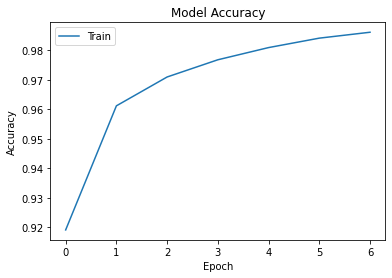

In [10]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

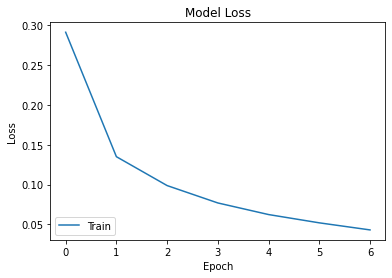

In [11]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower left')
plt.show()

Evaluate model

In [8]:
ann_hidden.evaluate(x_test_f, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0762 - accuracy: 0.9781: 0s -


[0.07615295797586441, 0.9781000018119812]

## Create predictions with new model

In [12]:
predictions_hidden = ann_hidden.predict(x_test_f)
predictions_hidden_labels = [np.argmax(prediction) for prediction in predictions_hidden]

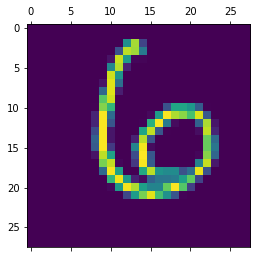

In [14]:
sample = 100
plt.matshow(x_test[sample])

In [15]:
predictions_hidden_labels[sample]

6

## Plot confusion matrix

<AxesSubplot:>

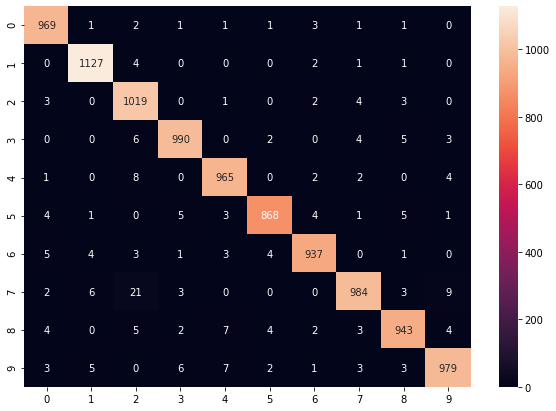

In [16]:
confusion_matrix_hidden = tf.math.confusion_matrix(labels=y_test, predictions=predictions_hidden_labels)

plt.figure(figsize = (10,7))
plt.xlabel('Predicted Value')
plt.ylabel('Truth Value')
sb.heatmap (confusion_matrix_hidden, annot=True, fmt='d')